In [5]:
from pdkit.gait_time_series import GaitTimeSeries
from pdkit.gait_processor import GaitProcessor

In [27]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np

In [7]:
ts = GaitTimeSeries.load_data('../tests/data/cloudupdrs_gait.csv')
gp = GaitProcessor()

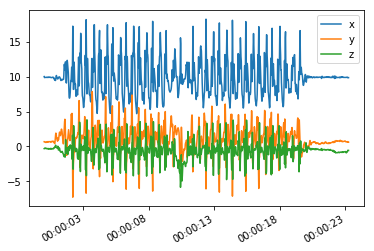

In [4]:
freeze_times, freeze_indexes, locomotion_freezes = gp.freeze_of_gait(ts)

In [37]:
freeze_indexes

[2.0229597446205783,
 1.8162459981882775,
 1.9943703659825391,
 2.0962335385648743,
 1.9553966149187563,
 3.1868342578699087,
 2.9483169010720474,
 2.9327461208382224,
 2.262528079399512,
 2.6985282781187725,
 2.1075414218917436,
 2.4946095534954758,
 2.122866676170536,
 2.800183939617057,
 1.9906767580361673,
 1.8571521952756058,
 1.4185542488031768,
 1.0104766238419909,
 0.904848700486044,
 1.1023259851453922,
 1.6972693614341943,
 1.7625628061842689,
 1.6416391833505406,
 1.855081203997259,
 1.7884858929012497,
 1.8577990398601534,
 1.5667343489452676,
 1.7624403198755905,
 1.6724902078400945,
 1.659990892288312,
 1.598944994750257,
 2.191193205987883,
 2.32127535930988,
 2.6171579167920562,
 2.1832651986781695,
 1.2896940154267278,
 0.7944237870303018,
 0.5745238180956264,
 0.48597395995654075,
 0.691029394669036,
 0.5339579242940563,
 0.1133032593454634]